> # Logistic Regression #

#### Logistic regression is a method which classify data by caculating weight addition of input features. Different from linear regression, its output is logistic of result value. ####
## $ \hat{p} = h_\theta(\mathbf{x}) = \sigma(\theta^T\mathbf{x}) $ ##
#### Sigma means logistic function. ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings('ignore')
x = np.arange(-8,8,0.1)
logi_fuc = 1/(1+np.exp(-x))

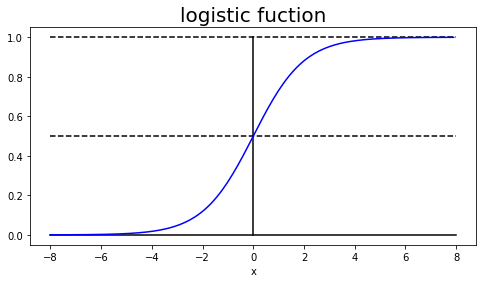

In [2]:
plt.figure(figsize=(8,4))
plt.plot([-8,8], [1,1], c='black', linestyle = '--')
plt.plot([0,0], [0,1], c = 'black')
plt.plot([-8,8], [0.5,0.5], c = 'black', linestyle = '--')
plt.plot([-8,8], [0,0], c='black')
plt.xlabel('x') ; plt.title('logistic fuction', fontsize = 20)

plt.plot(x,logi_fuc, c = 'blue', label = 'logistic function')

#### Logistic model estimate a probability of that sample x is in class 1. If the probability is >= 0.5, the model predict sample x in class 1. and the other hand, the model predict sample x in class 0. It's same that the model predict sample x in calss 1 when regression fomula is >= 0. ####

#### And cost function of logistic regression is like ####
## $ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$ ##
#### There is not known solution that calculate minimum value of this cost fuction. But since it is convex, gradient descent can find global minimum point. The differential value essential to do gradient descent is like that.  ####
## $ \frac{d}{d\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^T\mathbf{x}^{(i)}) - y^{(i)})x_j^{(i)} $ ##

In [3]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['virginica'] = (data['Species'] == 'Iris-virginica').astype(np.int)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [5]:
X = data['PetalWidthCm'].values.reshape(-1,1)
Y = data['virginica']

In [6]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(X,Y)

LogisticRegression()

In [7]:
X_image = np.arange(0,3,0.003).reshape(-1,1)
y_image = logis.predict_proba(X_image)

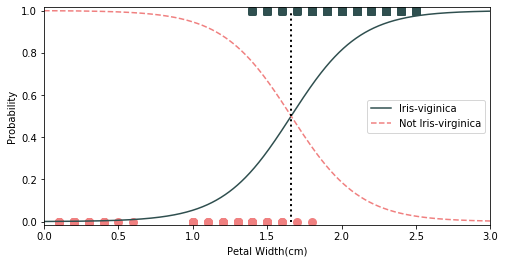

In [8]:
plt.figure(figsize = (8,4)) ; plt.ylabel('Probability') ; plt.xlabel('Petal Width(cm)'); plt.xlim(0,3); plt.ylim(-0.015,1.015)
plt.plot(X_image, y_image[:,1], color = 'darkslategrey', label = 'Iris-viginica')
plt.plot(X_image, y_image[:,0], color = 'lightcoral', linestyle = '--', label = 'Not Iris-virginica')
plt.scatter(X[Y==1],Y[Y==1] , color = 'darkslategrey', marker = 's', linewidths = 3)
plt.scatter(X[Y==0],Y[Y==0], color = 'lightcoral', linewidths = 3)

a = X_image[np.argmin(abs(y_image[:,0] - y_image[:,1]))]
plt.plot([a,a], [0,1], color = 'black', linestyle = 'dotted', linewidth = 2)
plt.legend()

#### This model is strongly predict iris whose petal is over 2cm as virginica. And iris that has under 1cm petal is strongly predicted as not virginica. Classification between two values is not confident, however the model will give us class 0 or 1 which has higher probability. And decision boundary is formed at about 1.6cm ####

In [9]:
X_2 = data[['PetalLengthCm', 'PetalWidthCm']]
logis_2 = LogisticRegression()
logis_2.fit(X_2, Y)

LogisticRegression()

In [10]:
print(logis_2.coef_,logis_2.intercept_)

[[2.77759875 2.38552765]] [-17.54799286]


Text(5.13, 1.0, 'decision boundary')

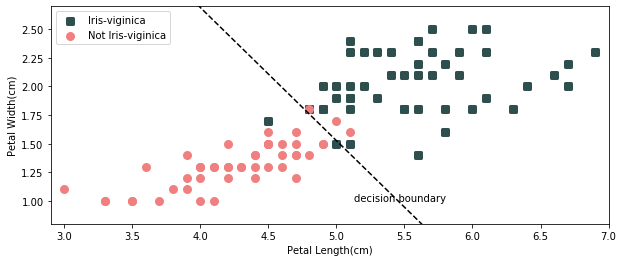

In [11]:
plt.figure(figsize = (10,4)) ; plt.ylabel('Petal Width(cm)') ; plt.xlabel('Petal Length(cm)'); plt.xlim(2.9,7); plt.ylim(0.8,2.7)
plt.scatter(X_2['PetalLengthCm'][Y==1], X_2['PetalWidthCm'][Y==1], color = 'darkslategrey', label = 'Iris-viginica', marker = 's', linewidth = 3)
plt.scatter(X_2['PetalLengthCm'][Y==0], X_2['PetalWidthCm'][Y==0], color = 'lightcoral', label = 'Not Iris-viginica', linewidth = 3)
plt.legend(loc = 'upper left')

a = np.arange(2,8,1)
b = (17.55 - 2.78*a) / 2.39
plt.plot(a, b, color = 'black', linestyle='--'); plt.text(5.13,1.0,'decision boundary')


># **Softmax Regression** #

#### Logistic regression we saw above can be applied at binary classification. In multinomial classification problem, softmax regression make us don't have to make several binary regression.  ####

#### Softmax regression calculate scores of class k and applies softmax function at scores. And probability about each class is derived. ####

## Score of class k : $ s_k(\mathbf{x}) = (\theta^{(k)})^T\mathbf{x} $ ##
## Probability of class k : $ \hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K}exp(s_j(\mathbf{x}))}  $ ##
#### At the end, the model returns a class which has the highest probability. ####

#### Cross entrophy cost function is useful to estimate how right at target class the predicted probability of class is. ####
## Cross entrophy fucntion: $ J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}log(\hat{p}_k^{(i)}) $ ##
## Gradient vector of cross entrophy : $ \triangledown_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)} - y_k^{(i)})\mathbf{x}^{(i)} $ ##

In [12]:
X_soft = data[['PetalLengthCm', 'PetalWidthCm']]
Y_soft = data['Species']

In [15]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)   ## C: l2 penalty reciprocal of alpha
softmax_reg.fit(X_soft, Y_soft)

LogisticRegression(C=10, multi_class='multinomial')

In [16]:
softmax_reg.predict([[5,2]])

array(['Iris-virginica'], dtype=object)

In [17]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])